In [7]:
pip install scikit-learn


     ---------------------------------------- 9.2/9.2 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install --upgrade seaborn matplotlib

  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


                                   CAR PRICE PREDICTION USING MACHINE LEARNING

In [ ]:
Car price prediction is a fascinating and practical application of machine learning and data analysis. 
It involves using historical data about various car attributes and their corresponding prices to build predictive
models that can estimate the price of a car given its features. The goal of car price prediction is to create accurate models 
that can help determine the fair market value of a vehicle. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\CarPrice_Assignment.csv")
print(df)

     car_ID  symboling                   CarName fueltype aspiration   
0         1          3        alfa-romero giulia      gas        std  \
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...   
0          two  convertible        rwd          front       88

In [3]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.shape

(205, 26)

In [6]:
headers=df.columns
headers

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
 df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [8]:
cat_col = [col for col in df.columns if df[col].dtype == 'object'] 
print('Categorical columns :',cat_col)                                     
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical columns : ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [10]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

                            EXPLORATORY DATA ANALYSIS

<Axes: xlabel='price', ylabel='Count'>

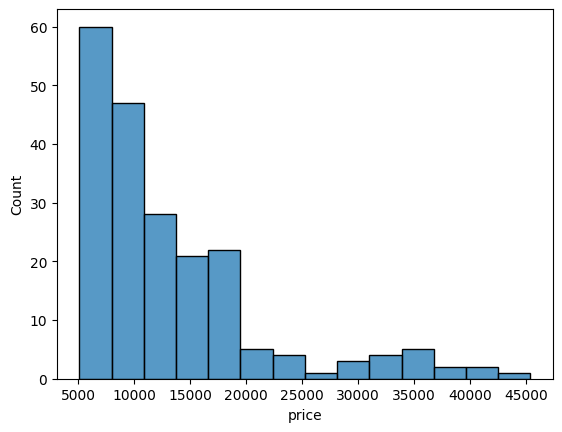

In [11]:
sns.histplot(df['price'])

 Using Histplot analysis the price,the price is a prediction value

In [12]:
df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

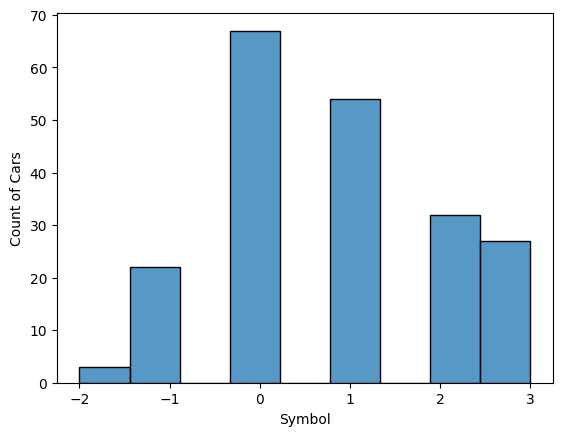

In [13]:
plt1 = sns.histplot(df['symboling'])
plt1.set(xlabel='Symbol', ylabel='Count of Cars')
plt.show()

The plot will display the distribution of cars across different symboling levels,

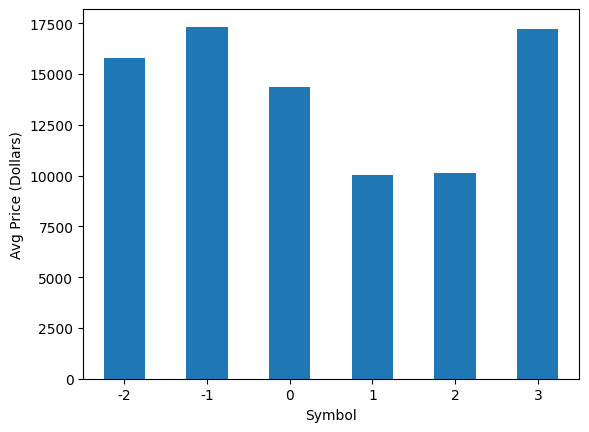

In [14]:
plt1 = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

This plot gives you insights into how the average prices of cars vary across 
symboling categories.

In [15]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
replacement_dict = {
    'alfa-romero': 'romeo',
    'maxda': 'mazda',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'alfa-mazda': 'mazda',
    'Nissan': 'nissan',
    'porsche': 'porcshce'
}

# Apply the replacements to both columns
df['CompanyName'] = df['CompanyName'].replace(replacement_dict, regex=True)
# Print the updated DataFrame
df['CompanyName']


0      romeo
1      romeo
2      romeo
3       audi
4       audi
       ...  
200    volvo
201    volvo
202    volvo
203    volvo
204    volvo
Name: CompanyName, Length: 205, dtype: object

In [18]:
df['CompanyName'].unique()

array(['romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porcshce', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


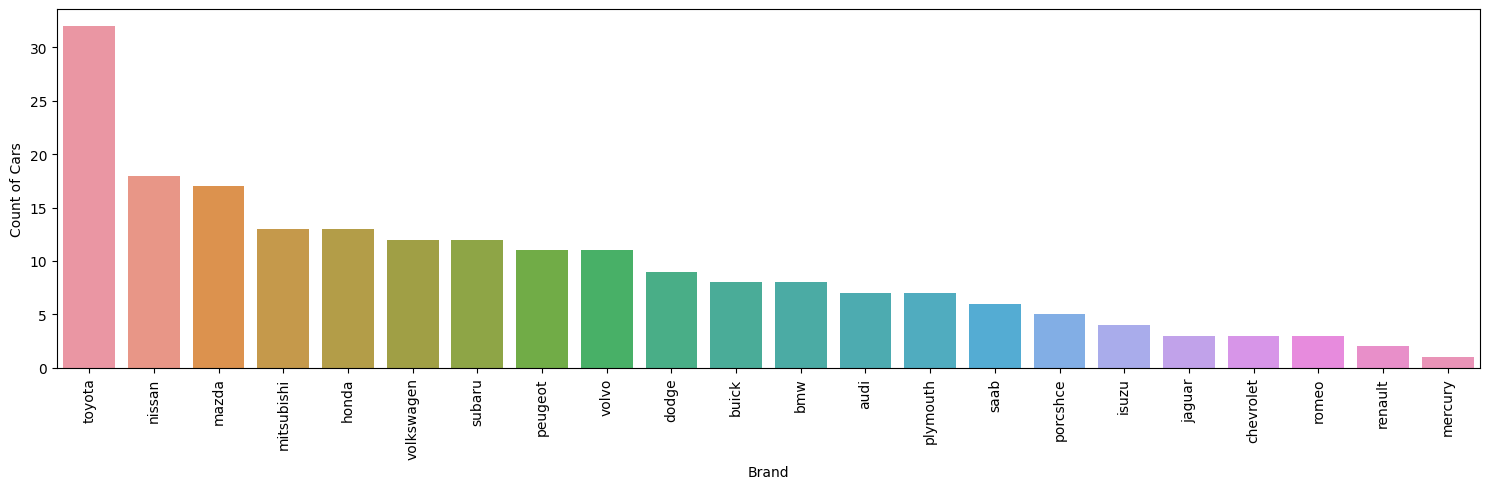

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
plt1 = sns.countplot(data=df, x='CompanyName', order=pd.value_counts(df['CompanyName']).index)
plt1.set(xlabel='Brand', ylabel='Count of Cars')
plt.xticks(rotation=90)
plt.tight_layout()  # This adjusts the layout within the figure
plt.show()  # This displays the 

 This plot gives you insights into the distribution of cars across various car brands in the dataset.

In [21]:
df['CompanyName'].describe()

count        205
unique        22
top       toyota
freq          32
Name: CompanyName, dtype: object


Toyota, a Japanese company has the most no of models

                                        Average car price of each company

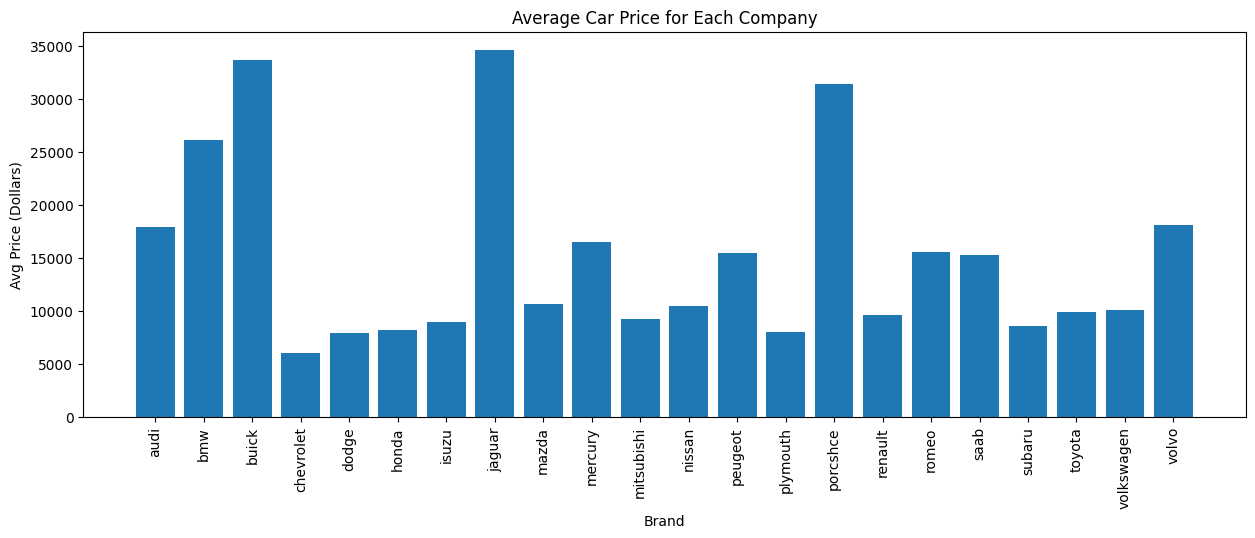

In [22]:
 
avg_price = df.groupby("CompanyName", as_index=False)["price"].mean()

# Rename the 'price' column to 'brand_avg_price'
avg_price = avg_price.rename(columns={'price': 'brand_avg_price'})

# Create the bar plot
plt.figure(figsize=(15, 5))
plt1 = plt.bar(avg_price["CompanyName"], avg_price["brand_avg_price"])

# Set labels and rotation for better readability
plt.xlabel("Brand")
plt.ylabel("Avg Price (Dollars)")
plt.xticks(rotation=90)
plt.title("Average Car Price for Each Company")

# Display the plot
plt.show()



In summary, the code is processing data to calculate the average car price for each car company

In [23]:
df=df.merge(avg_price,on='CompanyName')


In [24]:
def categorize_price(price):
    if price < 10000:
        return "Budget"
    elif 10000 <= price < 20000:
        return "Mid_Range"
    else:
        return "Luxury"

df['brand_category'] = df['brand_avg_price'].apply(categorize_price)
unique_categories = df['brand_category'].unique()

print(unique_categories)

['Mid_Range' 'Luxury' 'Budget']


In [25]:
df1 = df

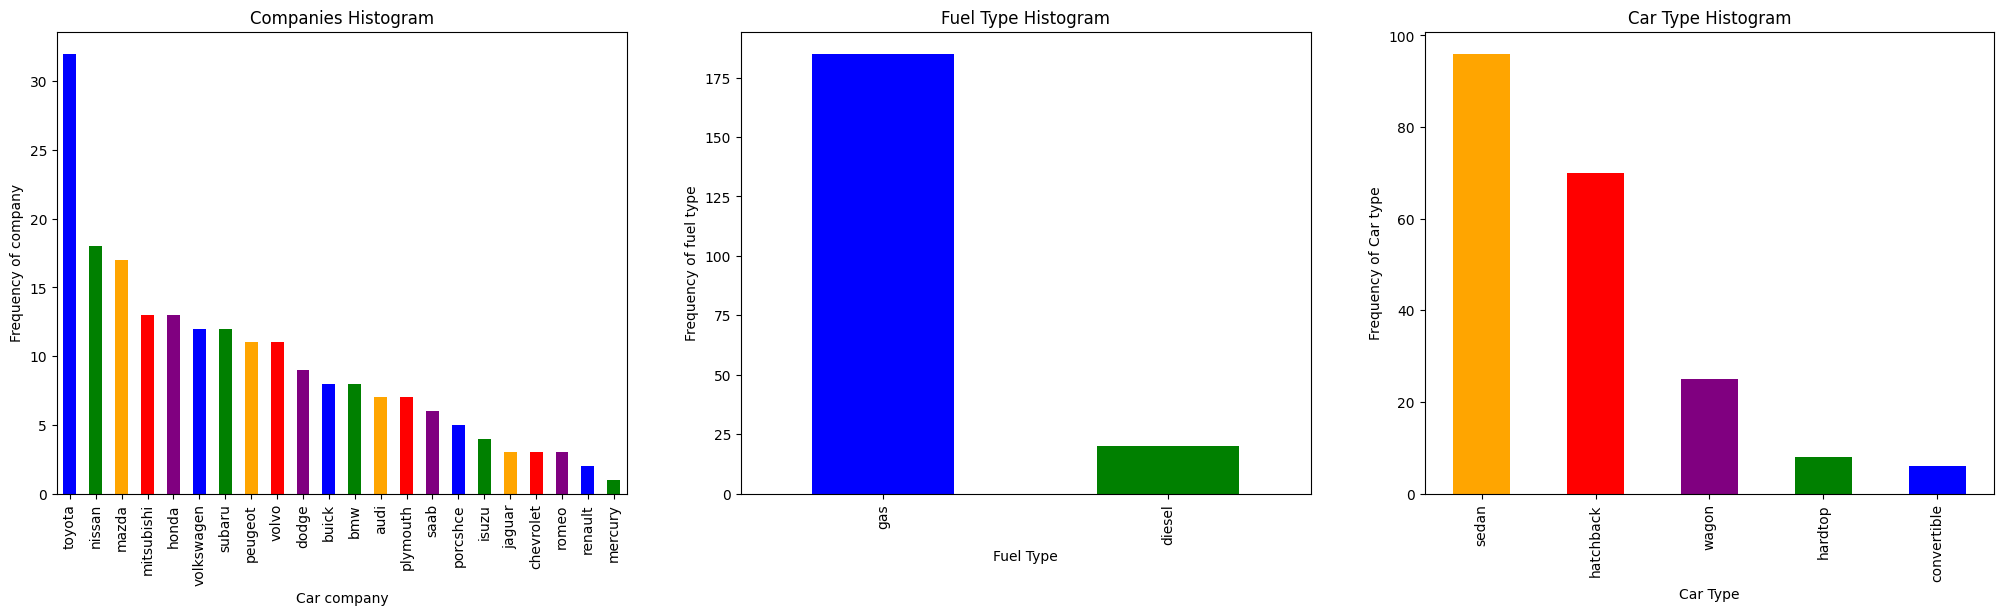

In [26]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df1.CompanyName.value_counts().plot(kind='bar',color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df1.fueltype.value_counts().plot(kind='bar',color=['blue', 'green'])
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df1.carbody.value_counts().plot(kind='bar',color=['orange', 'red','purple','green','blue'])
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()


This shows the counts of carcompany,fueltype,cartype

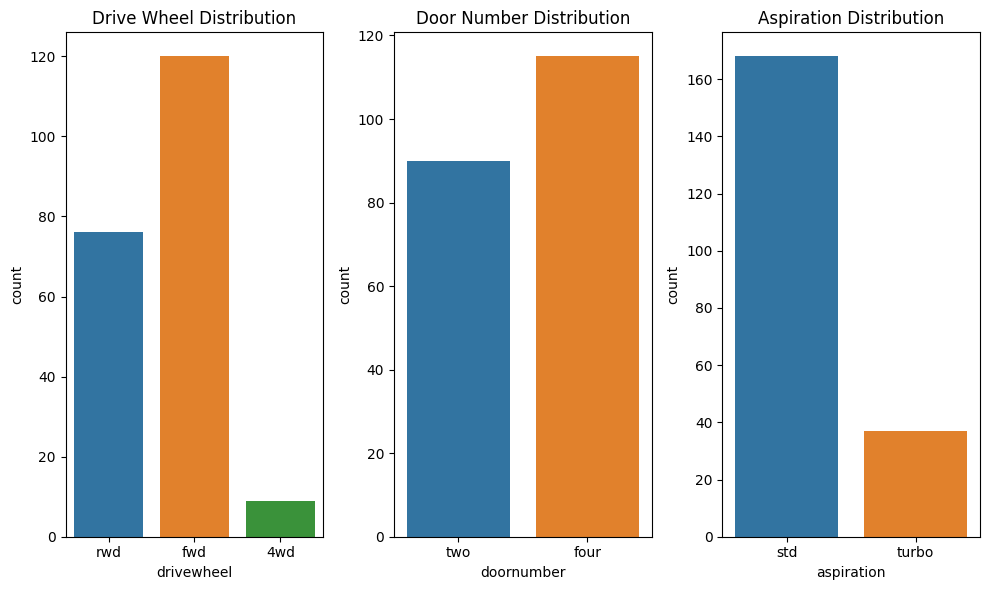

In [27]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.countplot(df1, x='drivewheel')
plt.title('Drive Wheel Distribution')

plt.subplot(1, 3, 2)
sns.countplot(df1, x='doornumber')
plt.title('Door Number Distribution')

plt.subplot(1, 3, 3)
sns.countplot(df1, x='aspiration')
plt.title('Aspiration Distribution')

plt.tight_layout()
plt.show()

In [28]:
df1['fuelsystem']=df1['fuelsystem'].replace('mfi','mpfi')
df1['fuelsystem'].unique()

array(['mpfi', '2bbl', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

<Axes: title={'center': 'enginetype Histogram'}, xlabel='enginetype', ylabel='count'>

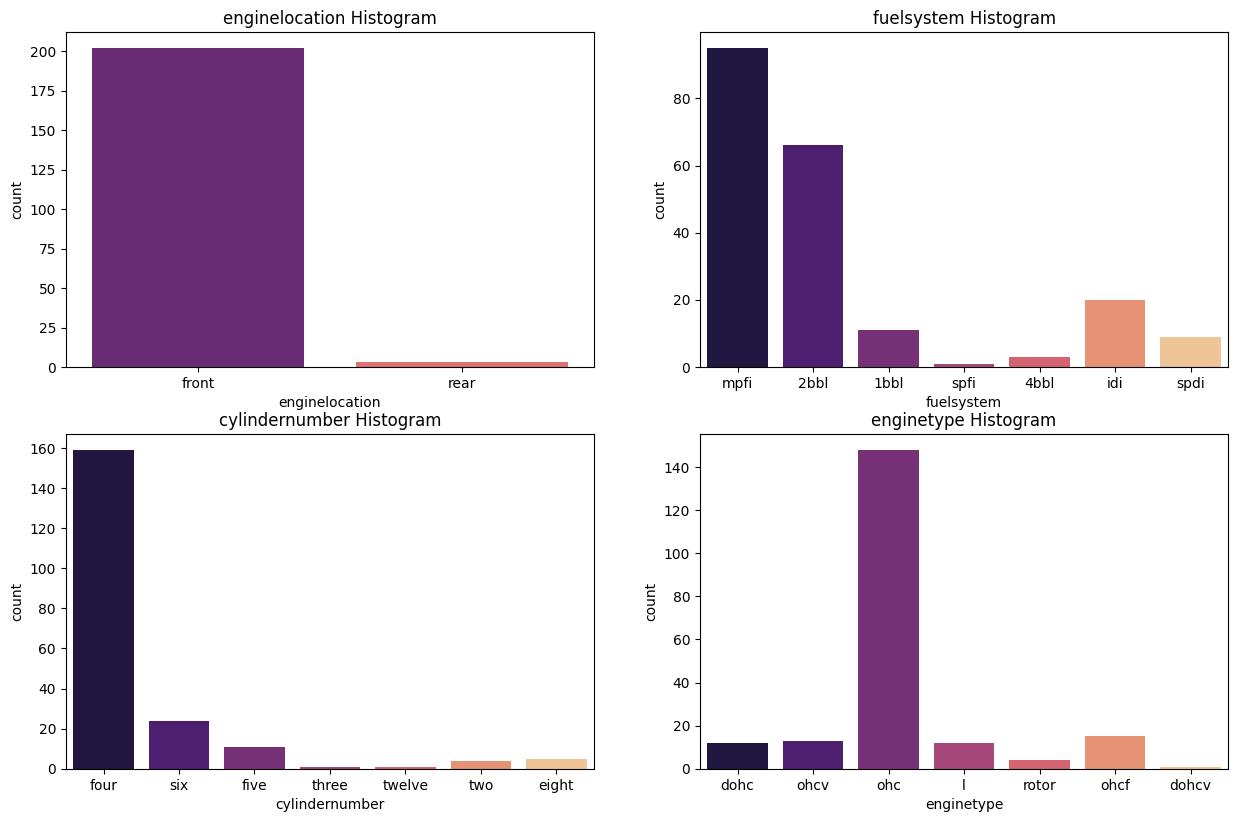

In [29]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
plt.title('enginelocation Histogram')
sns.countplot(data=df1, x='enginelocation', palette='magma')
plt.subplot(4, 2, 2)
plt.title('fuelsystem Histogram')
sns.countplot(data=df1, x='fuelsystem', palette='magma')
plt.subplot(4, 2, 3)
plt.title('cylindernumber Histogram')
sns.countplot(data=df1, x='cylindernumber', palette='magma')
plt.subplot(4, 2, 4)
plt.title('enginetype Histogram')
sns.countplot(data=df1, x='enginetype', palette='magma')

This plot shows the count of enginelocation,fuelsystem,cylindernumber,enginetype

<Axes: title={'center': 'wheelbase vs Price'}, xlabel='enginelocation', ylabel='price'>

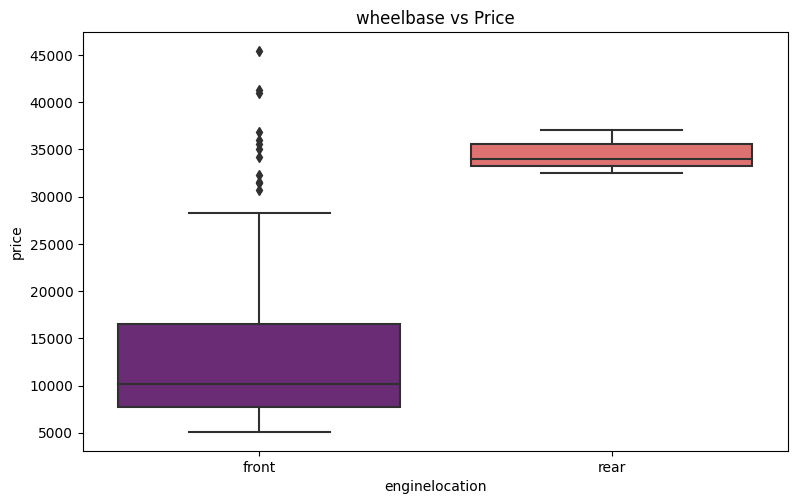

In [30]:
plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 1)
plt.title('wheelbase vs Price')
sns.boxplot(data=df1, x='enginelocation', y='price', palette='magma')


The boxplot will visually display the distribution of car prices ('price' variable) for different engine locations ('enginelocation' variable). Each box represents the interquartile range (IQR) of the data distribution, with the median marked by a line inside the box. Potential outliers are shown as individual points outside the "whiskers" of the box. 

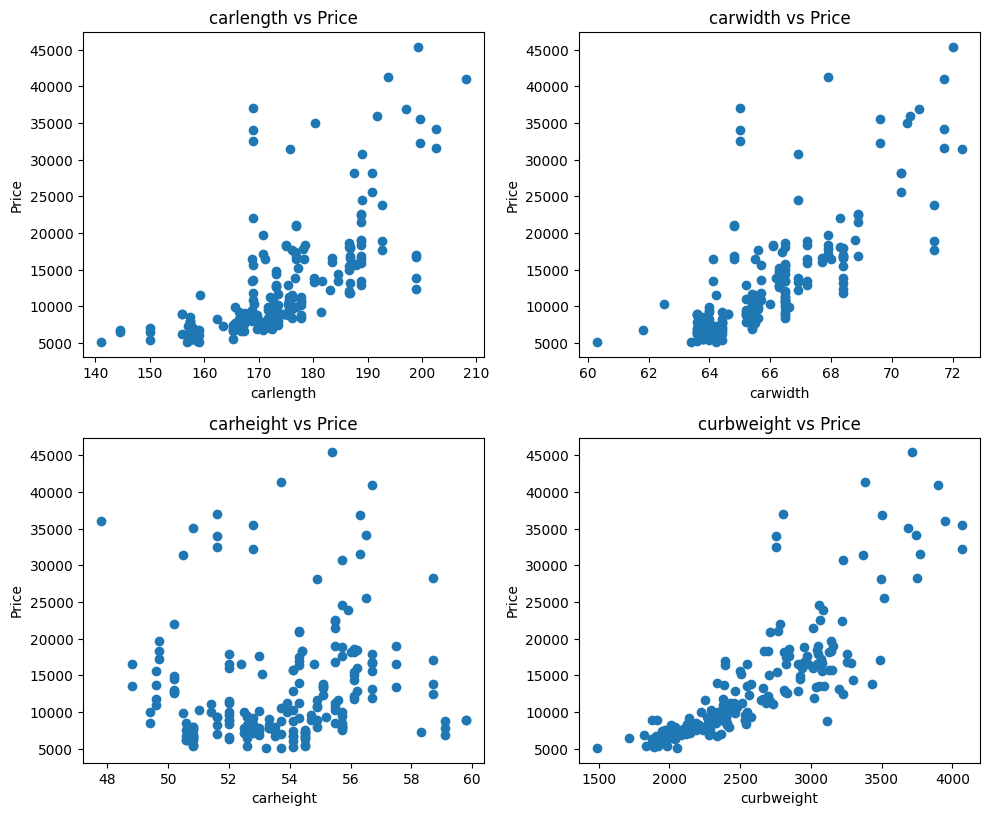

In [31]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df1[x],df1['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


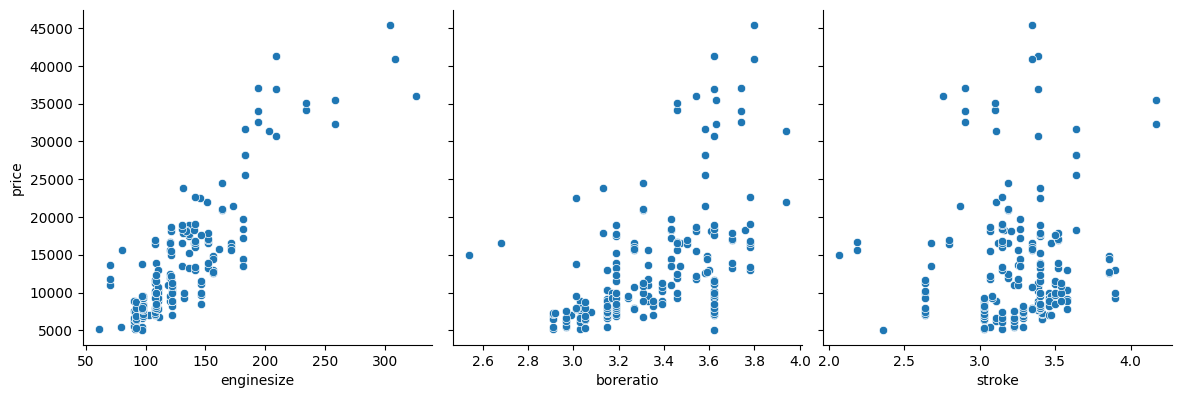

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


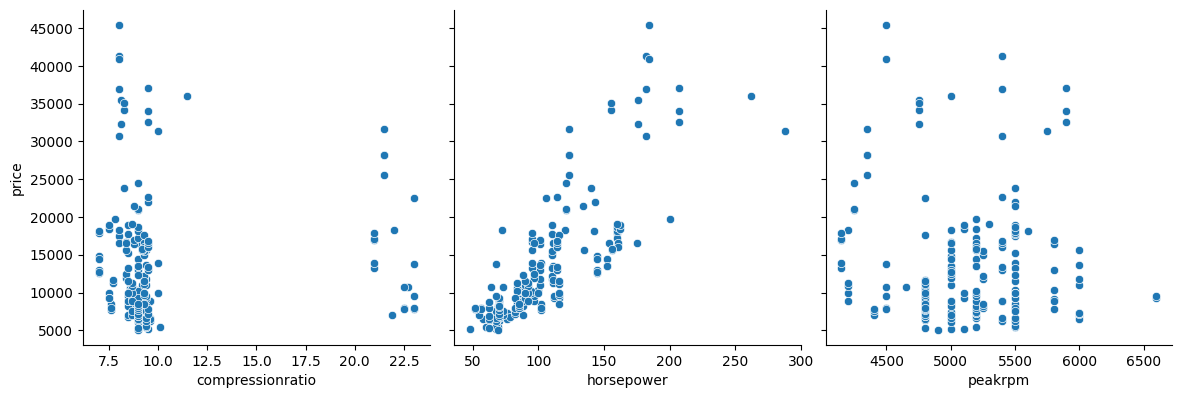

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


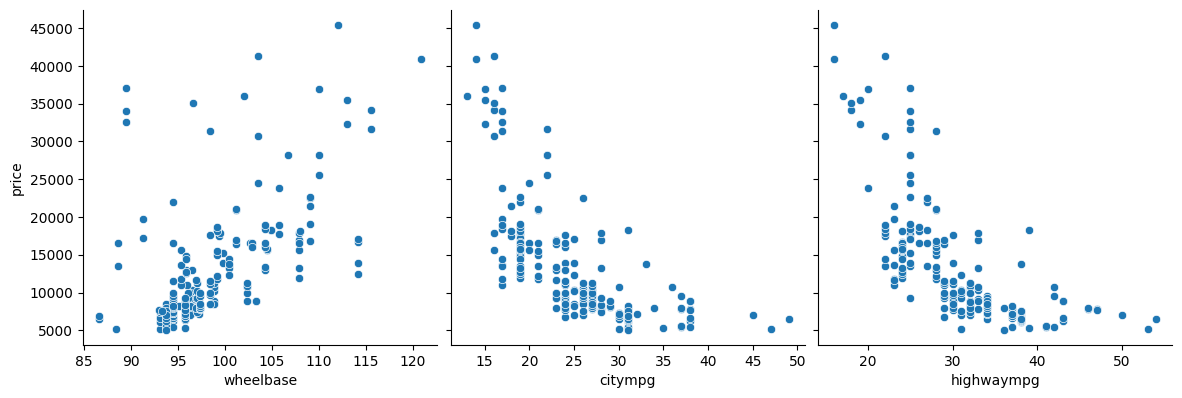

In [31]:
 pairs = [['enginesize', 'boreratio', 'stroke'],
         ['compressionratio', 'horsepower', 'peakrpm'],
         ['wheelbase', 'citympg', 'highwaympg']]

# Create pair plots for each set of variables
for pair in pairs:
    sns.pairplot(df1, x_vars=pair, y_vars='price', kind='scatter', height=4, aspect=1)
    plt.show()


In [32]:
df1['mileage'] = df1['citympg']*0.55 + df1['highwaympg']*0.45
df1['mileage']

0      23.70
1      23.70
2      22.15
3      26.70
4      19.80
       ...  
200    25.25
201    21.70
202    20.25
203    26.45
204    21.70
Name: mileage, Length: 205, dtype: float64

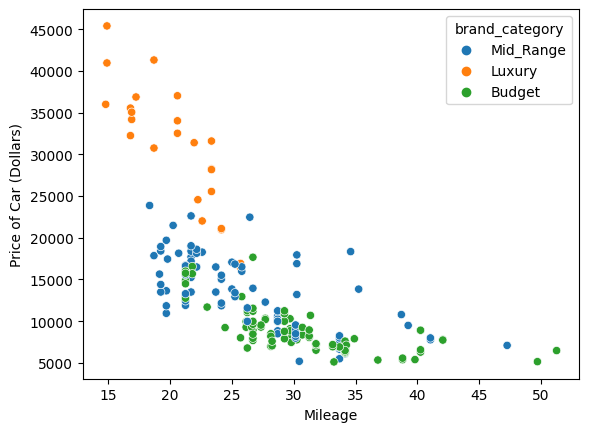

In [33]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df1,hue='brand_category')
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()


This scatter plot allows you to visually analyze the relationship between mileage and price for different 
car brands or categories. It can help you identify trends, patterns, or potential outliers in the data,

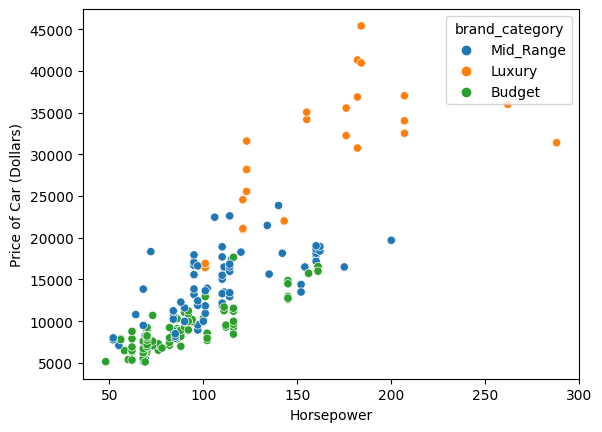

In [34]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', data = df1,hue='brand_category')
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

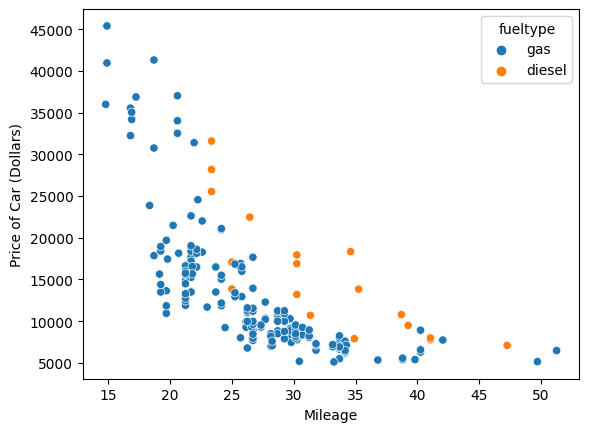

In [35]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = df1)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

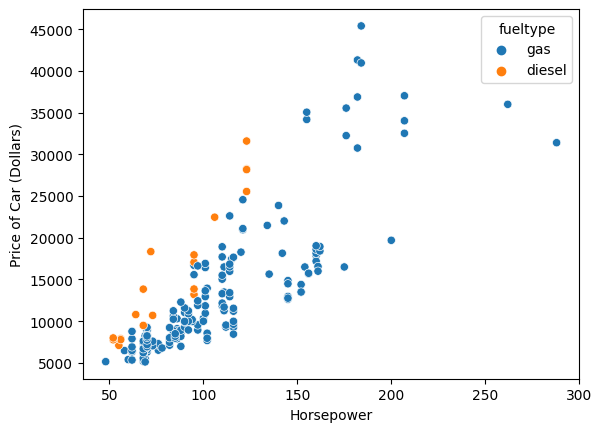

In [36]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = df1)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

In [37]:
df1

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_avg_price,brand_category,mileage
0,1,3,romeo,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,15498.333333,Mid_Range,23.70
1,2,3,romeo,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,15498.333333,Mid_Range,23.70
2,3,1,romeo,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,15498.333333,Mid_Range,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,17859.166714,Mid_Range,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,17859.166714,Mid_Range,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23,28,16845.0,18063.181818,Mid_Range,25.25
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19,25,19045.0,18063.181818,Mid_Range,21.70
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18,23,21485.0,18063.181818,Mid_Range,20.25
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26,27,22470.0,18063.181818,Mid_Range,26.45


In [38]:
new= df1[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'brand_category','price','mileage']]
new.head()


,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,brand_category,price,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,Mid_Range,13495.0,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,Mid_Range,16500.0,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,Mid_Range,16500.0,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,Mid_Range,13950.0,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,Mid_Range,17450.0,19.80


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

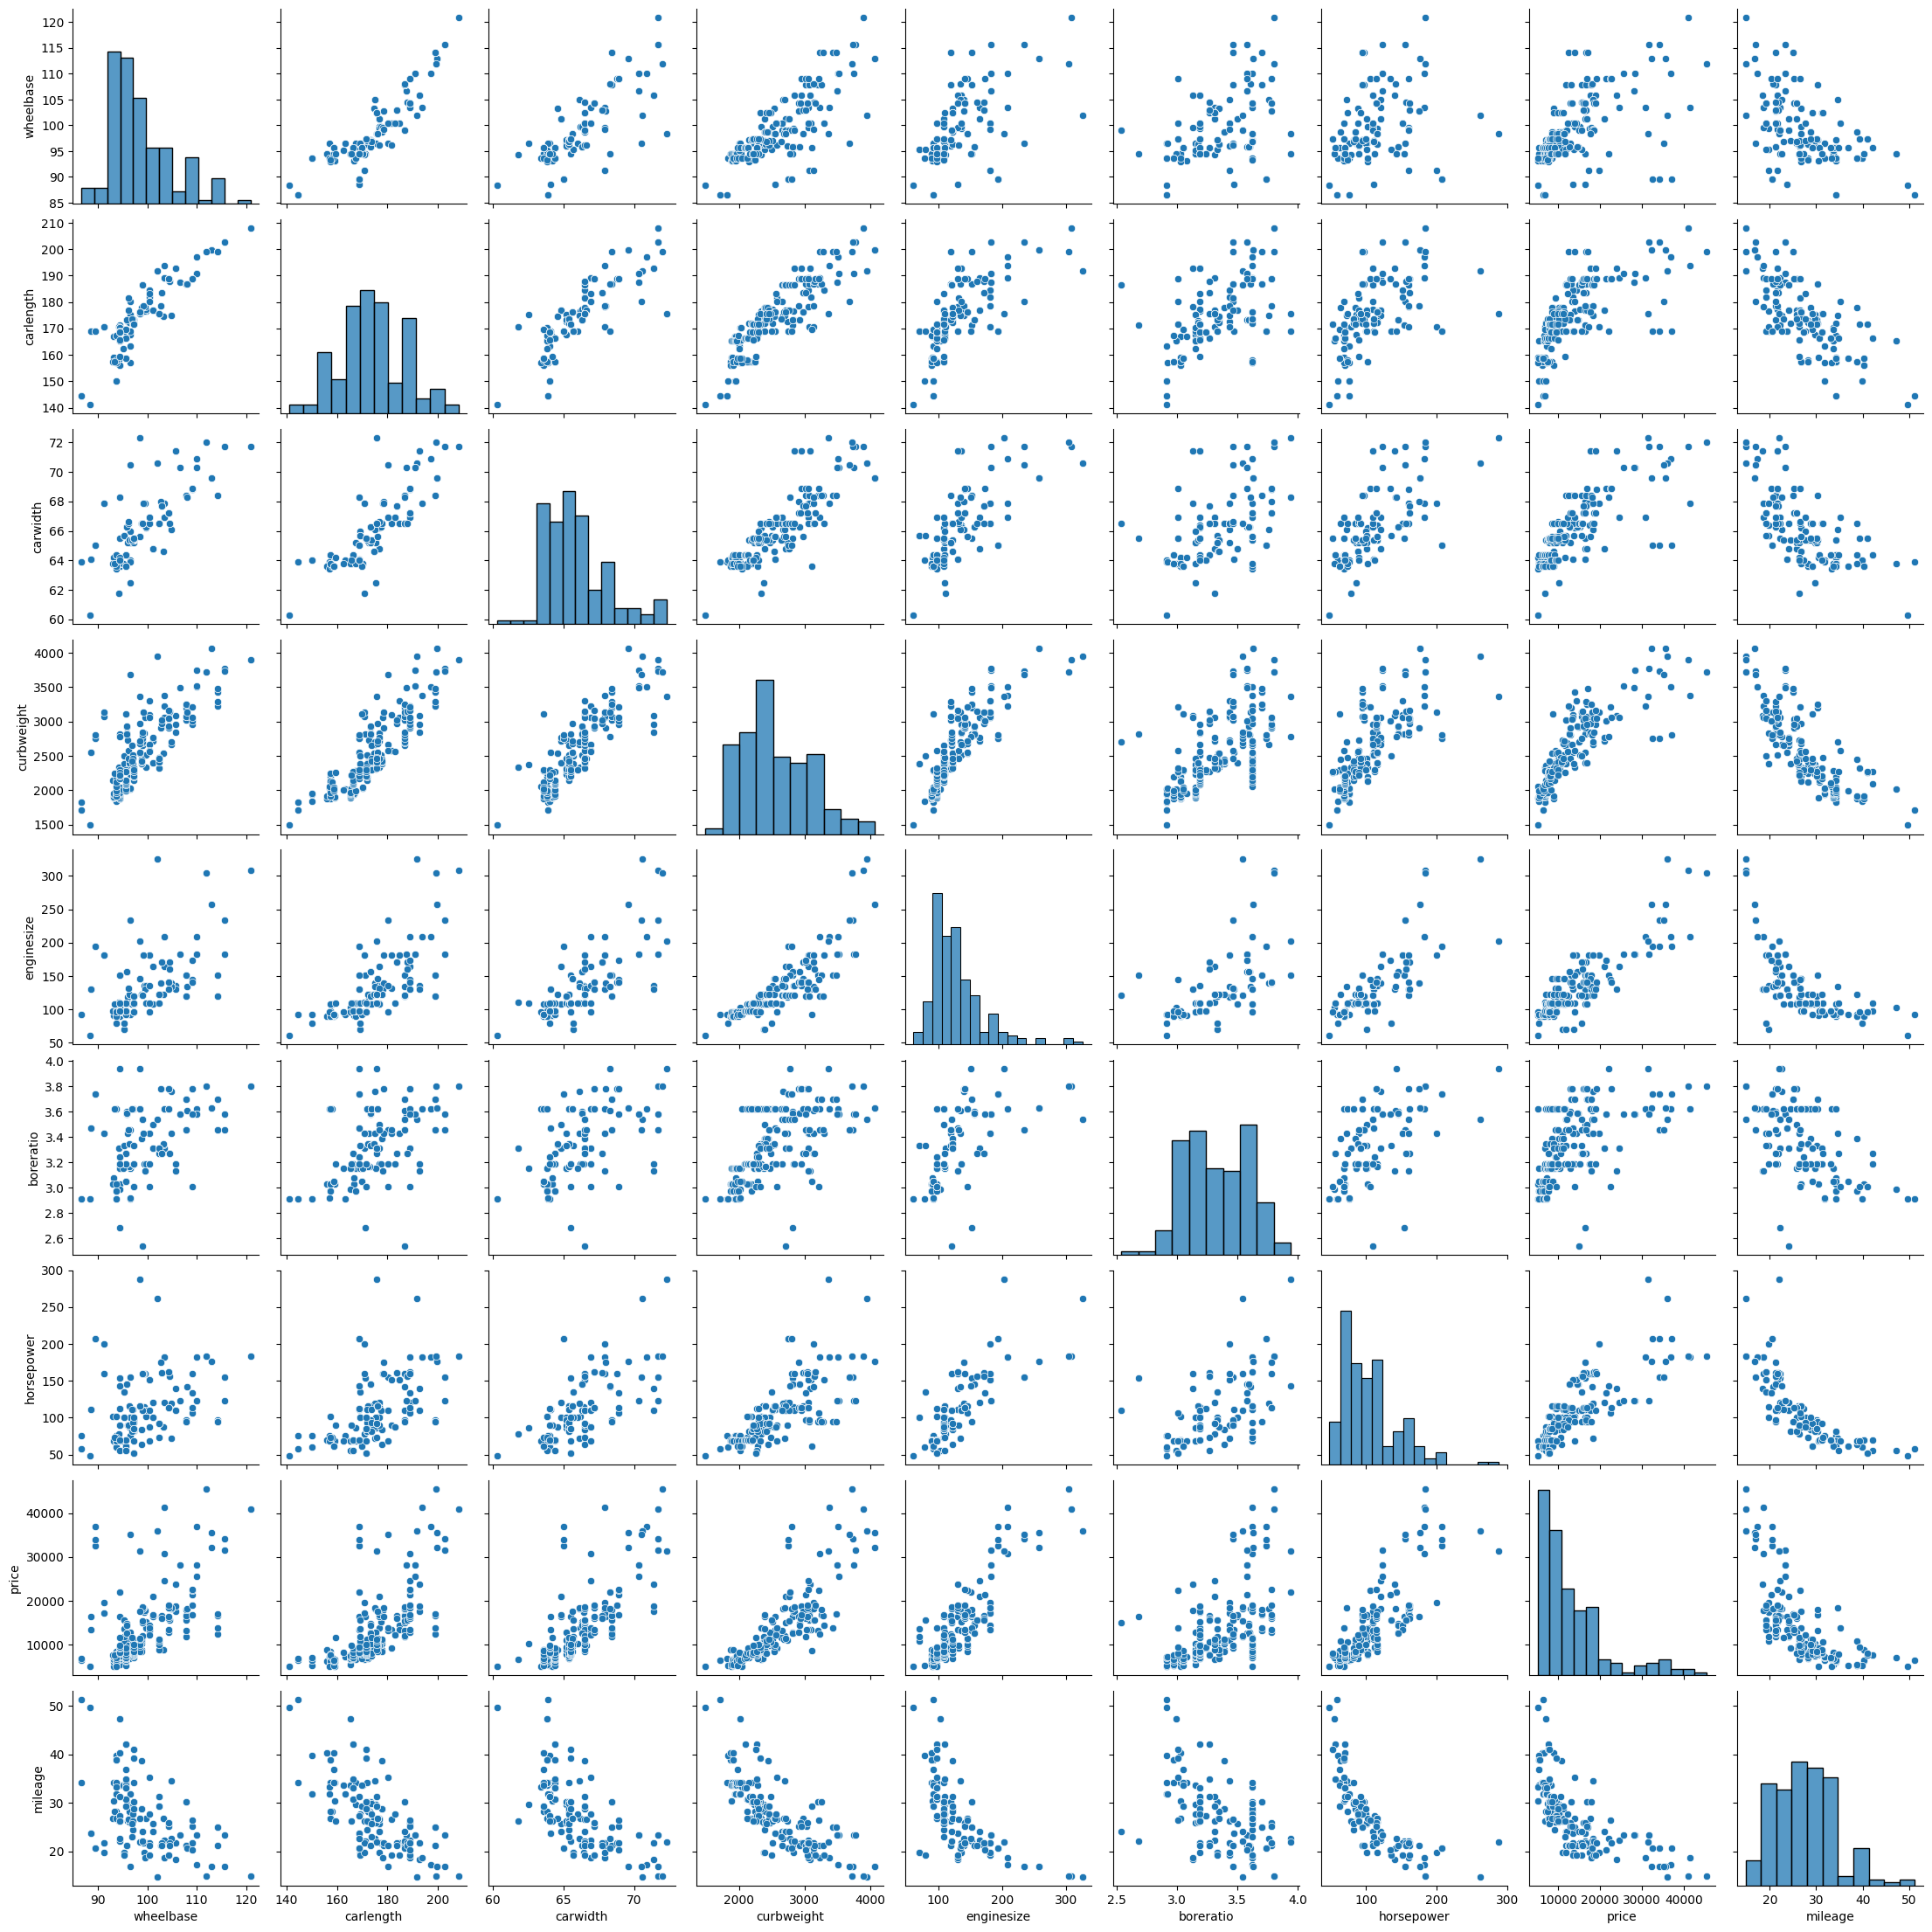

In [39]:
plt.figure(figsize=(15, 15))
sns.pairplot(new)
plt.show()

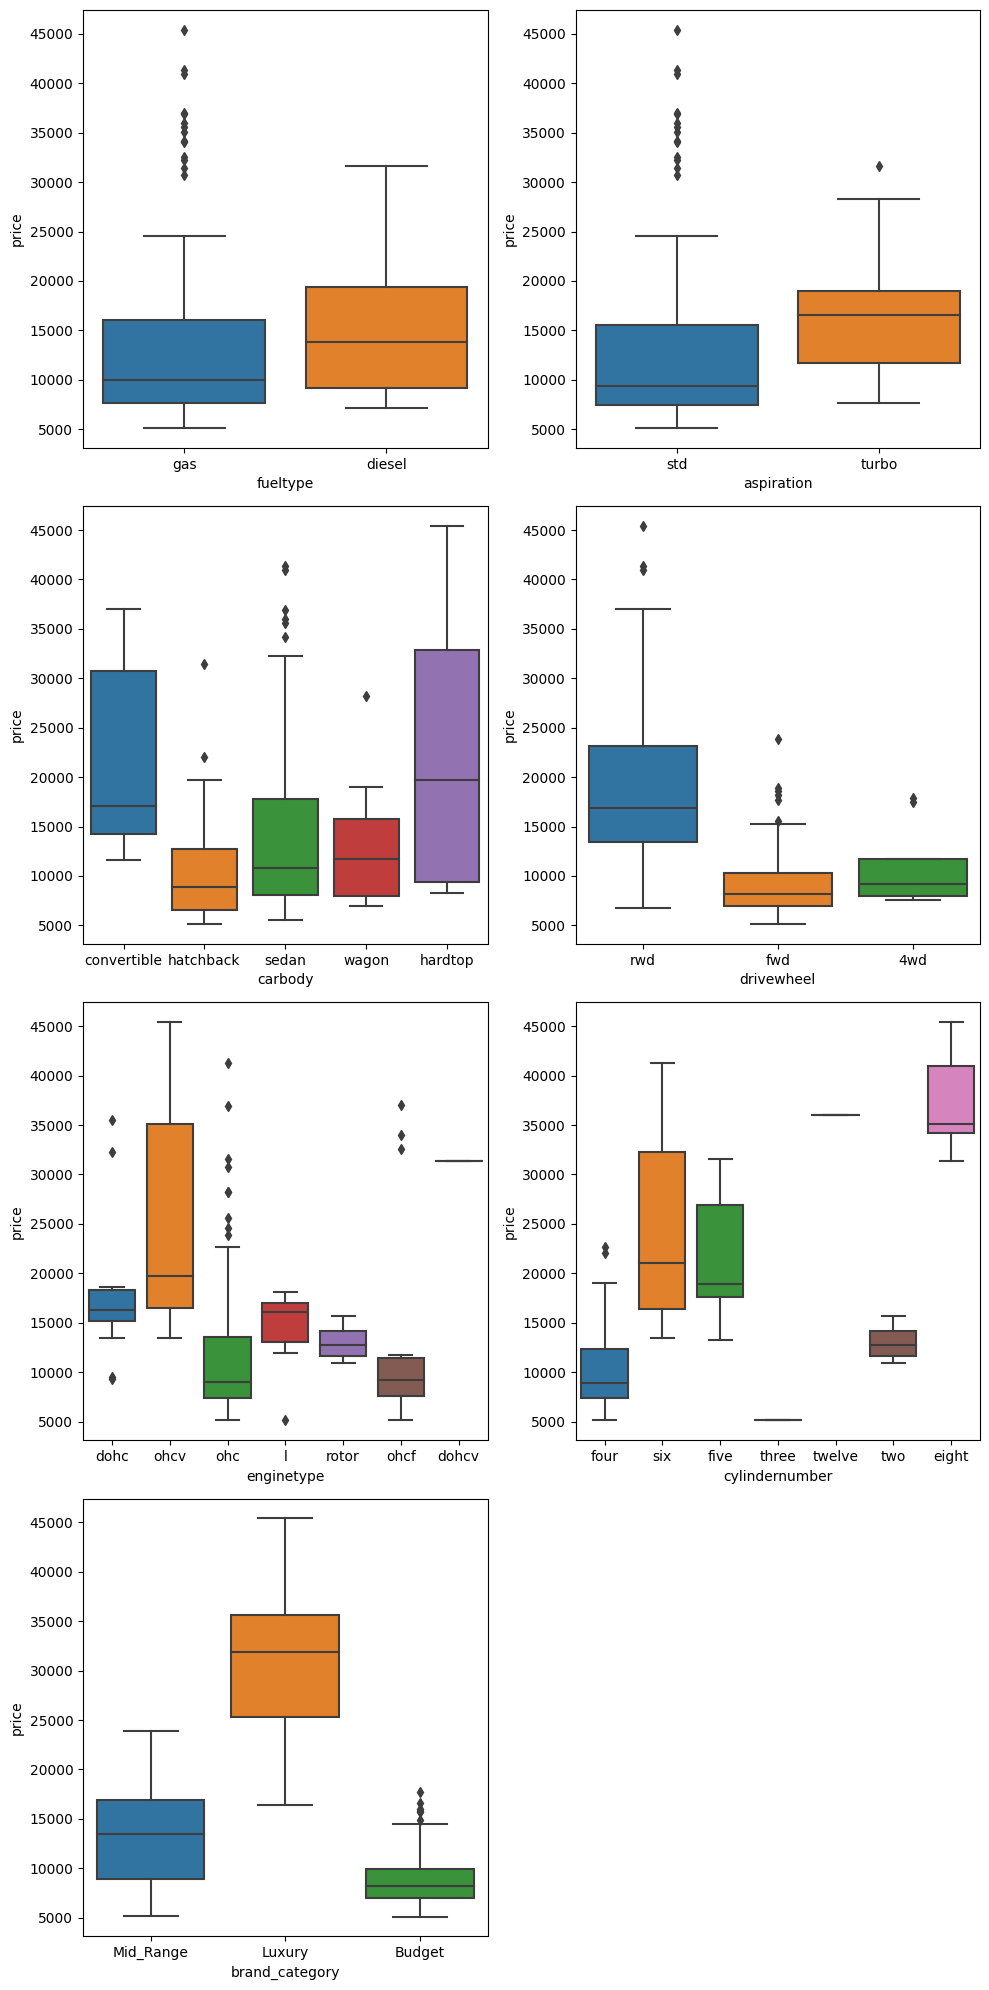

In [40]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = new)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = new)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = new)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = new)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = new)
plt.subplot(4,2,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = new)
plt.subplot(4,2,7)
sns.boxplot(x = 'brand_category', y = 'price', data = new)
plt.tight_layout()
plt.show()



                         CONVERT INTO CATEGORICAL COLUMNS

In [41]:
cyl_dummies = pd.get_dummies(new['cylindernumber'], prefix='cyl')

# Concatenate the DataFrame with the dummy variables
new = pd.concat([new, cyl_dummies], axis=1)



In [42]:
brand_cat = pd.get_dummies(new['brand_category'])
new = pd.concat([new, brand_cat], axis = 1)


In [43]:
eng_typ = pd.get_dummies(new['enginetype'])
new = pd.concat([new, eng_typ], axis = 1)


In [44]:
drwh = pd.get_dummies(new['drivewheel'])
new= pd.concat([new, drwh], axis = 1)


In [45]:
carb = pd.get_dummies(new['carbody'])
new = pd.concat([new, carb], axis = 1)


In [46]:
asp = pd.get_dummies(new['aspiration'])
new = pd.concat([new, asp], axis = 1)


In [47]:
fuelt = pd.get_dummies(new['fueltype'])
new = pd.concat([new, fuelt], axis = 1)


In [48]:
new.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

In [49]:
new

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,cyl_eight,...,rwd,convertible,hardtop,hatchback,sedan,wagon,std,turbo,diesel,gas
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,False,...,True,True,False,False,False,False,True,False,False,True
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,False,...,True,True,False,False,False,False,True,False,False,True
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,False,...,True,False,False,True,False,False,True,False,False,True
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,False,...,False,False,False,False,True,False,True,False,False,True
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,25.25,False,...,True,False,False,False,True,False,True,False,False,True
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,21.70,False,...,True,False,False,False,True,False,False,True,False,True
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,20.25,False,...,True,False,False,False,True,False,True,False,False,True
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,26.45,False,...,True,False,False,False,True,False,False,True,True,False


In [50]:
corr_matrix = new.corr()
corr_matrix

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,cyl_eight,...,rwd,convertible,hardtop,hatchback,sedan,wagon,std,turbo,diesel,gas
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816,-0.508136,0.261724,...,0.498830,-0.175071,-0.008608,-0.386094,0.291086,0.210899,-0.257611,0.257611,0.308346,-0.308346
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920,-0.691472,0.245778,...,0.538370,-0.051722,0.047292,-0.436269,0.269647,0.219683,-0.234539,0.234539,0.212679,-0.212679
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325,-0.663419,0.423530,...,0.511149,-0.026328,0.066360,-0.222308,0.154637,0.060639,-0.300567,0.300567,0.233880,-0.233880
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305,-0.781535,0.342656,...,0.669987,0.082272,0.098956,-0.287501,0.099425,0.164075,-0.324902,0.324902,0.217275,-0.217275
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145,-0.669464,0.493638,...,0.565509,0.126483,0.239363,-0.216805,0.088459,-0.027518,-0.108217,0.108217,0.069594,-0.069594
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173,-0.589898,0.211989,...,0.574105,0.104056,0.208089,-0.227032,0.030517,0.105719,-0.212614,0.212614,0.054451,-0.054451
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139,-0.792822,0.357062,...,0.575564,0.121267,0.194801,-0.053770,-0.024097,-0.063081,-0.241685,0.241685,-0.163926,0.163926
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000,-0.696213,0.478614,...,0.638957,0.187681,0.225854,-0.262039,0.125716,-0.042310,-0.177926,0.177926,0.105679,-0.105679
mileage,-0.508136,-0.691472,-0.663419,-0.781535,-0.669464,-0.589898,-0.792822,-0.696213,1.000000,-0.252650,...,-0.559209,-0.123923,-0.107930,0.134749,0.013275,-0.087806,0.228080,-0.228080,0.227713,-0.227713
cyl_eight,0.261724,0.245778,0.423530,0.342656,0.493638,0.211989,0.357062,0.478614,-0.252650,1.000000,...,0.205996,0.160153,0.131433,-0.047169,-0.021640,-0.058926,0.074202,-0.074202,-0.051988,0.051988


<Axes: >

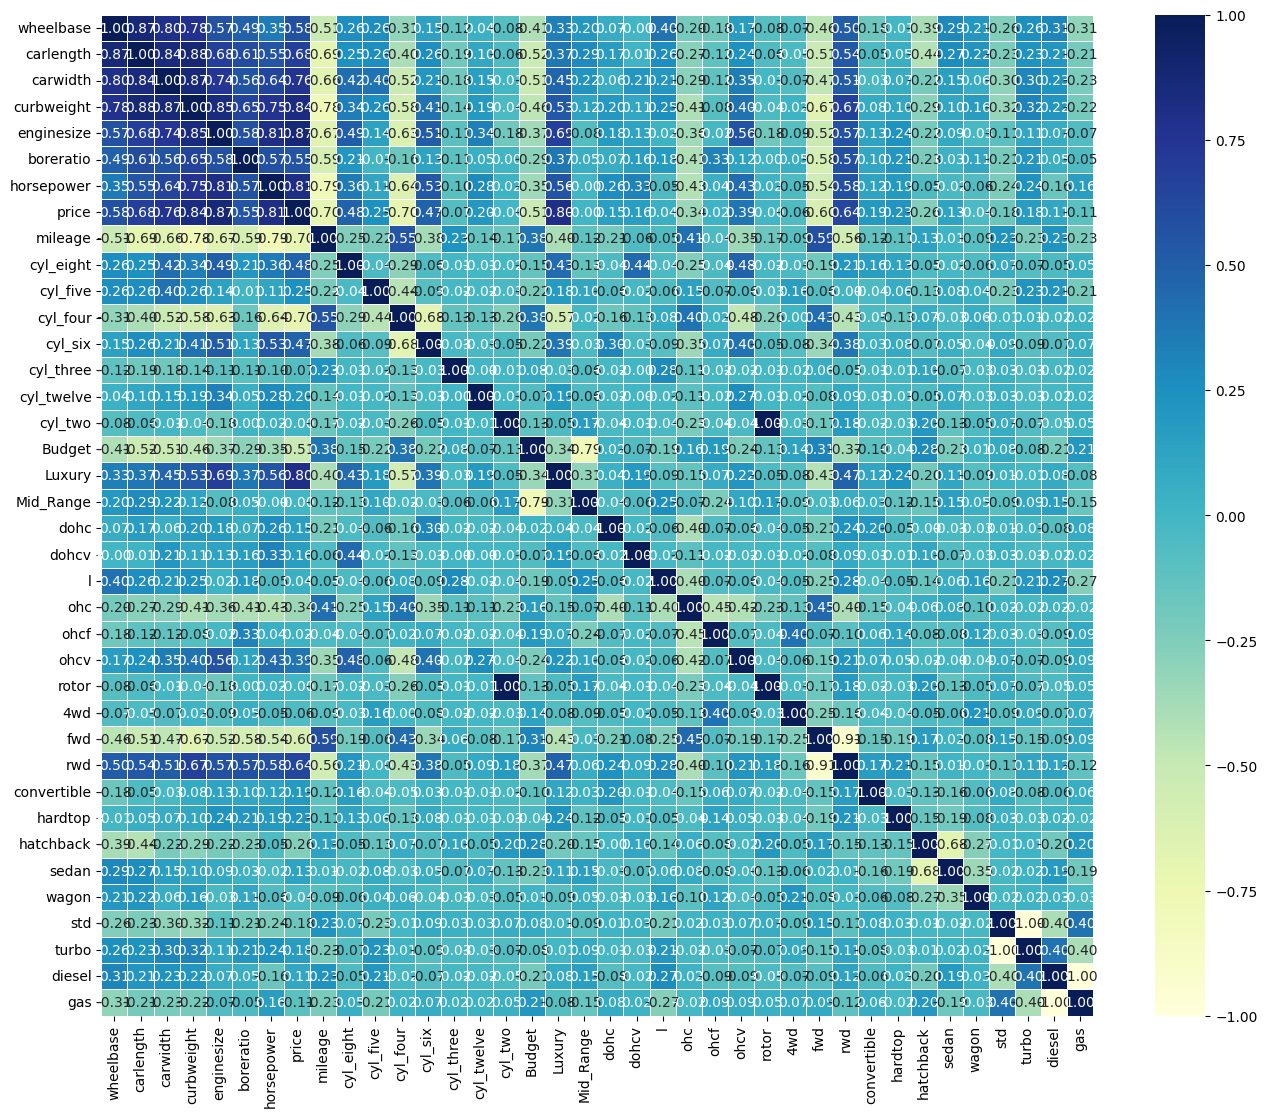

In [51]:
plt.figure(figsize = (16,13))
sns.heatmap(corr_matrix, annot = True, cmap = "YlGnBu", fmt = '.2f', linewidths = .5)

The resulting heatmap will visually represent the values in the corr_matrix using color intensity.
Darker colors will represent higher values, and lighter colors will represent lower values.

Heatmaps are commonly used to visualize relationships between variables in a matrix, 
such as correlation matrices where each cell represents the correlation coefficient between two variables. 

                    SPLIT THE DATASET TO PREDICT THE PRICE

In [52]:
finalvariable = new[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio','horsepower','price',
                      'mileage']]

X = finalvariable.drop(['price'], axis = 1)

y = finalvariable[['price']]


In [53]:
X

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage
0,88.6,168.8,64.1,2548,130,3.47,111,23.70
1,88.6,168.8,64.1,2548,130,3.47,111,23.70
2,94.5,171.2,65.5,2823,152,2.68,154,22.15
3,99.8,176.6,66.2,2337,109,3.19,102,26.70
4,99.4,176.6,66.4,2824,136,3.19,115,19.80
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,25.25
201,109.1,188.8,68.8,3049,141,3.78,160,21.70
202,109.1,188.8,68.9,3012,173,3.58,134,20.25
203,109.1,188.8,68.9,3217,145,3.01,106,26.45


In [54]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


                            FEATURE SCALING

In [56]:
from sklearn.preprocessing import MinMaxScaler
# Create an object for minmax scaler
scaler = MinMaxScaler()

scaler

MinMaxScaler()

In [57]:
X_scaled = scaler.fit_transform(X)

X_scaled

array([[0.05830904, 0.41343284, 0.31666667, ..., 0.66428571, 0.2625    ,
        0.2441701 ],
       [0.05830904, 0.41343284, 0.31666667, ..., 0.66428571, 0.2625    ,
        0.2441701 ],
       [0.2303207 , 0.44925373, 0.43333333, ..., 0.1       , 0.44166667,
        0.20164609],
       ...,
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.74285714, 0.35833333,
        0.14951989],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.33571429, 0.24166667,
        0.31961591],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.88571429, 0.275     ,
        0.18930041]])

In [58]:
y_scaled = scaler.fit_transform(y)

y_scaled

array([[2.07958890e-01],
       [2.82557966e-01],
       [2.82557966e-01],
       [2.19254257e-01],
       [3.06141701e-01],
       [2.51526737e-01],
       [3.12596197e-01],
       [3.42634427e-01],
       [4.65642222e-01],
       [3.16299265e-01],
       [2.80820217e-01],
       [2.93108584e-01],
       [3.93525644e-01],
       [3.96877017e-01],
       [4.82771461e-01],
       [6.36562236e-01],
       [8.98589941e-01],
       [7.88491137e-01],
       [8.19224468e-04],
       [2.92190060e-02],
       [3.61700015e-02],
       [1.12705427e-02],
       [3.12546547e-02],
       [7.04781292e-02],
       [2.75805571e-02],
       [3.90745246e-02],
       [6.18390348e-02],
       [8.53979445e-02],
       [9.44094136e-02],
       [1.94776823e-01],
       [3.37868030e-02],
       [4.31209970e-02],
       [6.97582047e-03],
       [3.50280522e-02],
       [4.99230426e-02],
       [5.40439899e-02],
       [5.40439899e-02],
       [6.89389802e-02],
       [9.87289608e-02],
       [9.25227149e-02],


                        TRAIN THE MODEL TO EVALUATE ITS PERFORMANCE

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 42)
X_train

array([[0.2303207 , 0.36119403, 0.29166667, ..., 0.32142857, 0.02916667,
        0.89026063],
       [0.4606414 , 0.51492537, 0.51666667, ..., 0.55      , 0.18333333,
        0.45130316],
       [0.2303207 , 0.43432836, 0.29166667, ..., 0.43571429, 0.0875    ,
        0.51851852],
       ...,
       [0.2303207 , 0.36119403, 0.29166667, ..., 0.43571429, 0.0875    ,
        0.51851852],
       [0.47521866, 0.63283582, 0.61666667, ..., 0.52142857, 0.47083333,
        0.17695473],
       [0.40233236, 0.64925373, 0.51666667, ..., 0.63571429, 0.43333333,
        0.12208505]])

In [61]:
X_test

array([[0.49271137, 0.71492537, 0.55      , 0.67571761, 0.55849057,
        0.77142857, 0.55833333, 0.10699588],
       [0.37609329, 0.55373134, 0.63333333, 0.60705974, 0.26415094,
        0.42142857, 0.46666667, 0.10699588],
       [0.3090379 , 0.48208955, 0.40833333, 0.31574864, 0.22264151,
        0.56428571, 0.20416667, 0.42112483],
       [0.36443149, 0.67910448, 0.51666667, 0.45384019, 0.22641509,
        0.71428571, 0.25833333, 0.25651578],
       [0.68221574, 0.74328358, 0.83333333, 0.87742436, 0.46037736,
        0.74285714, 0.3125    , 0.2345679 ],
       [0.2303207 , 0.36567164, 0.29166667, 0.2094647 , 0.13584906,
        0.43571429, 0.0875    , 0.51851852],
       [0.26530612, 0.3761194 , 0.34166667, 0.30527541, 0.18490566,
        0.52142857, 0.03333333, 0.74759945],
       [0.26530612, 0.3761194 , 0.34166667, 0.25290923, 0.13962264,
        0.46428571, 0.09166667, 0.43621399],
       [0.303207  , 0.48358209, 0.425     , 0.37509697, 0.17735849,
        0.77142857, 0.191666

In [62]:
y_train

array([[0.04917829],
       [0.09507969],
       [0.05538454],
       [0.25152674],
       [0.08269202],
       [0.16699767],
       [0.79216524],
       [0.00672757],
       [0.10215481],
       [0.29991063],
       [0.15217715],
       [0.28263244],
       [0.13852341],
       [0.043121  ],
       [0.39352564],
       [0.05404399],
       [0.41954223],
       [0.12976019],
       [0.04518147],
       [0.32351919],
       [0.06169008],
       [0.02425401],
       [0.28739884],
       [0.10972643],
       [0.19430515],
       [0.18981183],
       [0.03850355],
       [0.07047813],
       [0.06183903],
       [0.33518693],
       [0.29112259],
       [0.32351919],
       [0.28255797],
       [0.02658756],
       [0.14721215],
       [0.06183903],
       [0.71769028],
       [0.04644754],
       [0.        ],
       [0.05404399],
       [0.29683233],
       [0.13596644],
       [0.03125465],
       [0.25798123],
       [0.21664763],
       [0.03502805],
       [0.29310858],
       [0.343

In [63]:
y_test

array([[6.36562236e-01],
       [3.16299265e-01],
       [1.09999504e-01],
       [1.67121791e-01],
       [5.74201877e-01],
       [6.65557817e-02],
       [6.62827069e-02],
       [1.02775433e-01],
       [1.26110918e-01],
       [6.59599821e-02],
       [2.02993893e-01],
       [7.74539497e-02],
       [3.26746438e-01],
       [1.20897671e-01],
       [8.89777072e-01],
       [3.40102279e-02],
       [8.19224468e-04],
       [1.86460454e-01],
       [7.62375254e-02],
       [1.20202572e-01],
       [8.38339705e-02],
       [2.08058190e-01],
       [7.77270245e-02],
       [3.37868030e-02],
       [3.90745246e-02],
       [8.98589941e-01],
       [1.12233752e-01],
       [2.05972891e-01],
       [7.15207785e-02],
       [1.94181024e-01],
       [5.07273720e-01],
       [2.75805571e-02],
       [6.90134551e-02],
       [4.06310511e-01],
       [6.38250335e-02],
       [5.72414478e-01],
       [1.52450226e-01],
       [1.44655181e-01],
       [9.42977012e-02],
       [2.32634924e-01],


                                        LINEAR REGRESSION

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
linear_regression = LinearRegression()
linear_regression

LinearRegression()

In [67]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [68]:
print("Predictable price is : ")
y_predict = linear_regression.predict(X_test)

y_predict

Predictable price is : 


array([[ 0.51876211],
       [ 0.35477706],
       [ 0.15060378],
       [ 0.20826366],
       [ 0.45885974],
       [ 0.03272494],
       [ 0.04065548],
       [ 0.05666708],
       [ 0.13240575],
       [ 0.03118814],
       [ 0.26202937],
       [ 0.04942258],
       [ 0.26259547],
       [ 0.17765865],
       [ 0.82964496],
       [ 0.01500987],
       [-0.16741833],
       [ 0.33899845],
       [ 0.15485395],
       [ 0.12654252],
       [ 0.164205  ],
       [ 0.41659987],
       [ 0.03402511],
       [-0.03102795],
       [ 0.0219763 ],
       [ 0.5382442 ],
       [ 0.24515066],
       [ 0.27463335],
       [ 0.03052201],
       [ 0.269884  ],
       [ 0.4497114 ],
       [ 0.02111986],
       [ 0.03097681],
       [ 0.40901403],
       [ 0.10345024],
       [ 0.44915602],
       [ 0.16040174],
       [ 0.09159727],
       [ 0.00416934],
       [ 0.34245072],
       [ 0.10582243],
       [ 0.16819835],
       [ 0.24680408],
       [ 0.02026431],
       [ 0.0306725 ],
       [ 0

In [69]:
#Plotting
y_test.shape

(52, 1)

In [70]:
y_predict.shape

(52, 1)

In [71]:
y_pred = pd.DataFrame({
    'Actual Price': y_test.flatten(),
    'Predicted Price': y_predict.flatten()
})

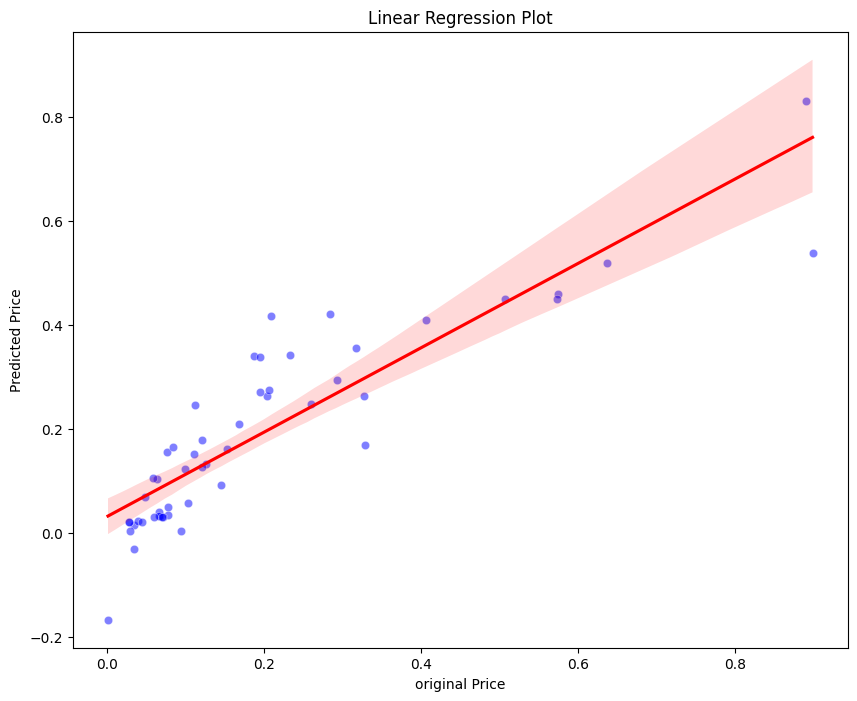

In [72]:
plt.figure(figsize=(10, 8))

# Scatter plot with regression line
sns.scatterplot(x='Actual Price', y='Predicted Price', data=y_pred, alpha=0.5, color='b')
sns.regplot(x='Actual Price', y='Predicted Price', data=y_pred, scatter=False, color='r')

plt.xlabel('original Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Plot')
plt.show()

                    CALCULATE MSE,RMSE,CROSS_VALIDATE

In [73]:
from sklearn.metrics import make_scorer,mean_squared_error,r2_score
from sklearn.model_selection import cross_validate

In [74]:
mse = np.mean(np.square(y_test,y_predict))
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08008149772011044


In [75]:
rmse = np.sqrt(np.mean(np.square(y_test , y_predict)))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.2829867447781087


In [76]:
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Perform cross-validation and calculate RMSE scores
cross_val_results = cross_validate(linear_regression, X_scaled, y_scaled, cv=5, scoring=rmse_scorer)

# Get the negative of the mean RMSE values (as sklearn's cross-validation minimizes the scores)
cross_rmse = -cross_val_results['test_score'].mean()

print("Cross Validation RMSE:", cross_rmse)


Cross Validation RMSE: 0.10356900964290772


The cross-validation RMSE is a measure of the average difference between the predicted values and the actual values across different folds of the cross-validation process. 
A lower RMSE value indicates that, on average, the predictions are close to the actual values.